### Homework 3, question 1 (Thomas Hollis 06/10/2018)

# 0. Import packages

In [178]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

# 1. Initialise variables & import test data

In [179]:
boston = load_boston() #converge within around 10
X = boston.data
y = np.expand_dims(boston.target, axis=1)

n = len(X)
w = np.zeros((X.shape[1],1))
b = np.zeros(1) #consider appending this to matrix X to have only 1 matrix
maxIteration = 50
alpha = 0.00001 #learning rate usually between 0.01 and 0.0001
cost = []

print(X.shape)
print(y.shape)
print(w.shape)
print(b.shape)

(506, 13)
(506, 1)
(13, 1)
(1,)


# 2. Full batch mode gradient descent

In [180]:
for cur_iter in range(maxIteration):
    
    #1. Compute prediction
    y_pred = np.add(np.dot(X, w), b)
    #print(y_pred.shape)
    
    #2. Compute huber loss & huber loss derivative (setting delta=1)
    diff = np.subtract(y_pred, y)
    huber_loss = np.where(np.abs(diff) <= 1, 0.5*(diff**2), np.abs(diff)-0.5)
    huber_loss_der = np.where(np.abs(diff) <= 1, diff, np.sign(diff))
    #print(diff.shape)
    
    #3. Compute gradient
    gradient_w = (alpha/n)*np.dot(X.T, huber_loss_der) 
    gradient_b = (alpha/n)*huber_loss_der
    #print(gradient.shape)
    
    #4. Update weights and bias
    w = w - gradient_w
    b = b - gradient_b
    
    #5. Compute cost
    cost.append(np.sum(huber_loss)*(1/n))
    
    print("Iteration #",cur_iter,"\n loss is",cost)

Iteration # 0 
 loss is [22.032806324110673]
Iteration # 1 
 loss is [22.032806324110673, 19.037996355572737]
Iteration # 2 
 loss is [22.032806324110673, 19.037996355572737, 16.1136371661308]
Iteration # 3 
 loss is [22.032806324110673, 19.037996355572737, 16.1136371661308, 13.566409261041189]
Iteration # 4 
 loss is [22.032806324110673, 19.037996355572737, 16.1136371661308, 13.566409261041189, 11.693520244537416]
Iteration # 5 
 loss is [22.032806324110673, 19.037996355572737, 16.1136371661308, 13.566409261041189, 11.693520244537416, 10.399702152010832]
Iteration # 6 
 loss is [22.032806324110673, 19.037996355572737, 16.1136371661308, 13.566409261041189, 11.693520244537416, 10.399702152010832, 9.470365101383916]
Iteration # 7 
 loss is [22.032806324110673, 19.037996355572737, 16.1136371661308, 13.566409261041189, 11.693520244537416, 10.399702152010832, 9.470365101383916, 8.873104329499691]
Iteration # 8 
 loss is [22.032806324110673, 19.037996355572737, 16.1136371661308, 13.566409261

# 3. Output result

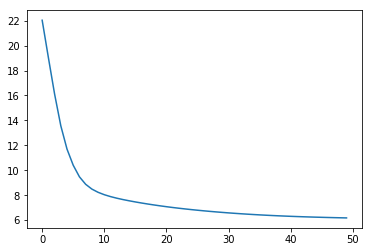

In [181]:
plt.plot(cost)